In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('.\data\StudentsPerformance.csv')

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df.shape

(1000, 8)

## Check Null Values

In [35]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Check Duplicate values

In [36]:
df.duplicated().sum()

0

## Check data types

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [38]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Exploring data

In [39]:
print("Categories in 'gender' variables: ",end=" ")
print(df['gender'].unique())

print("Categories in race/ethnicity variables: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in parental level of education variables: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch  variables: ",end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course variables: ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variables:  ['female' 'male']
Categories in race/ethnicity variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch  variables:  ['standard' 'free/reduced']
Categories in test preparation course variables:  ['none' 'completed']


In [40]:
# define numerical & categorical columns
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} no of numerical features: {}'.format(len(num_features),(num_features)))
print('We have {} no of categorical feature: {}'.format(len(categorical_features),categorical_features))

We have 3 no of numerical features: ['math score', 'reading score', 'writing score']
We have 5 no of categorical feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Adding column for 'Total Score' and 'Average'

In [41]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [43]:
total_math = df[df['math score']==100]['average'].count()
total_reading_score = df[df['reading score']==100]['average'].count()
total_writing_score = df[df['writing score']==100]['average'].count()

print('Total Student got full marks in math {}'.format(total_math))
print('Total Student got full marks in reading {}'.format(total_reading_score))
print('Total Student got full marks in writing {}'.format(total_writing_score))


Total Student got full marks in math 7
Total Student got full marks in reading 17
Total Student got full marks in writing 14


In [44]:
reading_less_20 = df[df['math score']<20]['average'].count()
math_less_20 = df[df['reading score']<20]['average'].count()
math_writing_20 = df[df['writing score']<20]['average'].count()

print('Total Student got less than 20 marks in math {}'.format(math_less_20))
print('Total Student got less than 20 marks in reading {}'.format(reading_less_20))
print('Total Student got less than 20 marks in writing {}'.format(math_writing_20 ))

Total Student got less than 20 marks in math 1
Total Student got less than 20 marks in reading 4
Total Student got less than 20 marks in writing 3


## Data Visualization

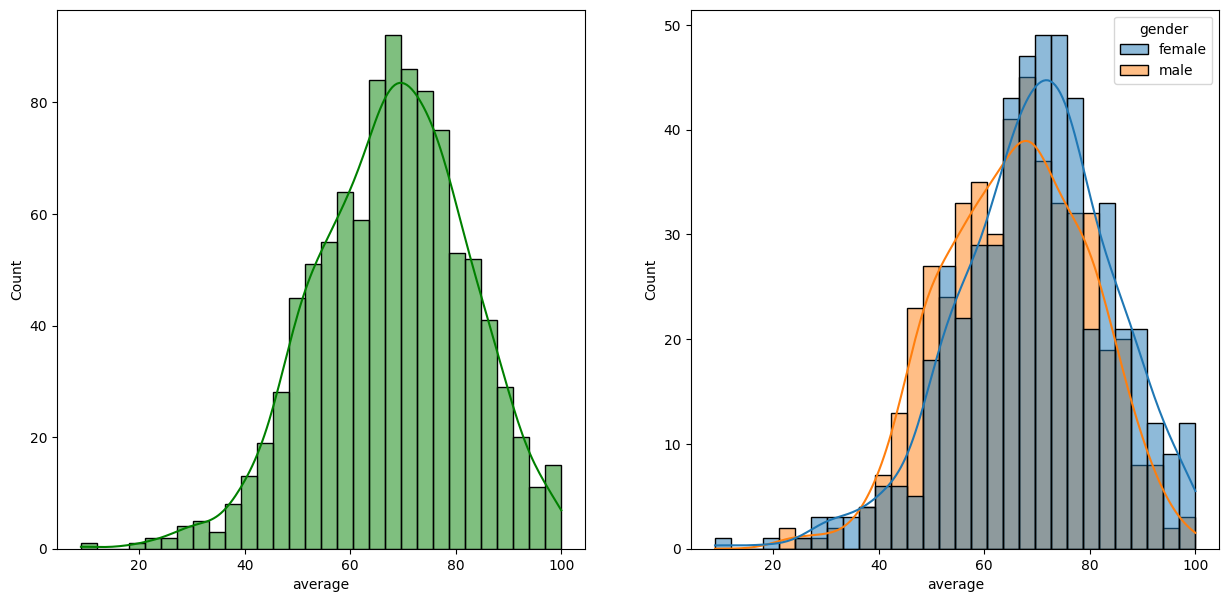

In [45]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(df, x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(df, x='average',bins=30,kde=True,hue='gender')
plt.show()



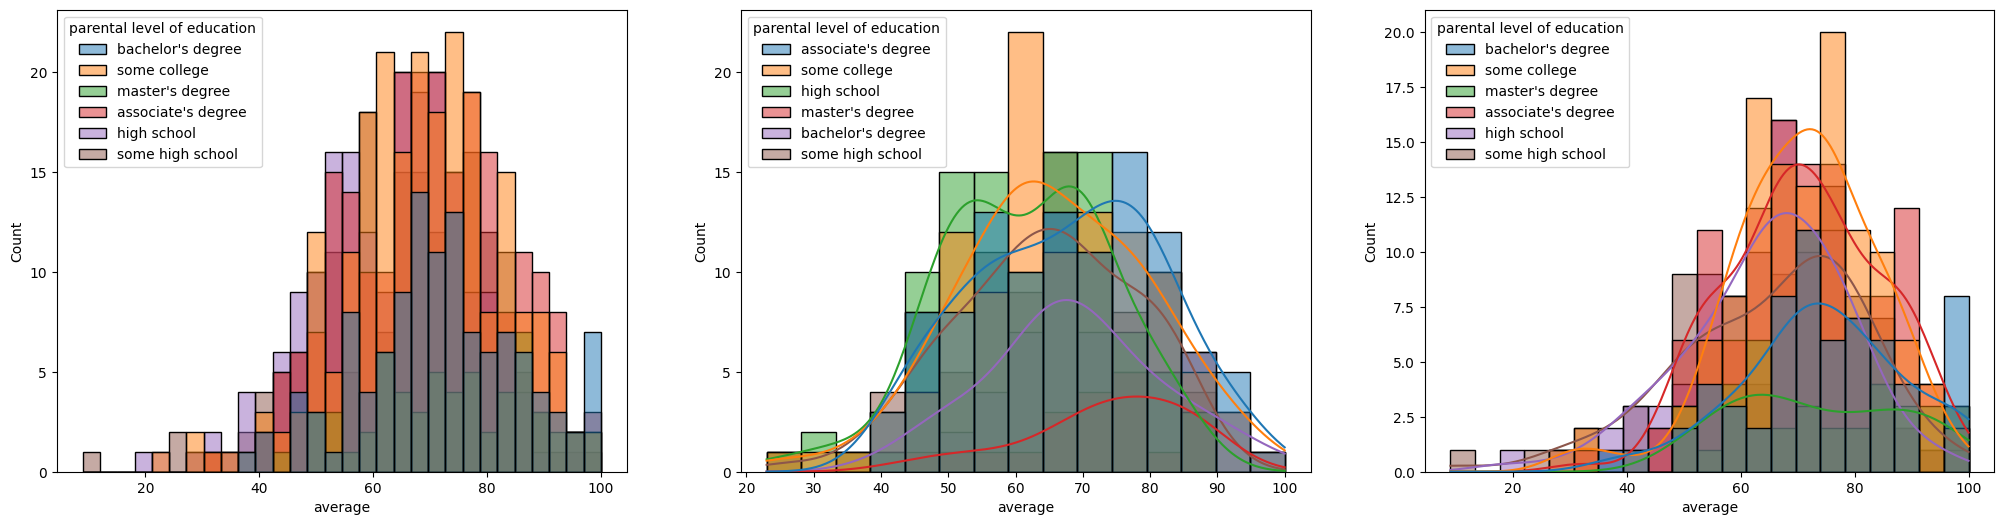

In [50]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
ax = sns.histplot(df,x='average',bins=30,hue='parental level of education')
plt.subplot(132)
ax = sns.histplot(df[df['gender']=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax = sns.histplot(df[df['gender']=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

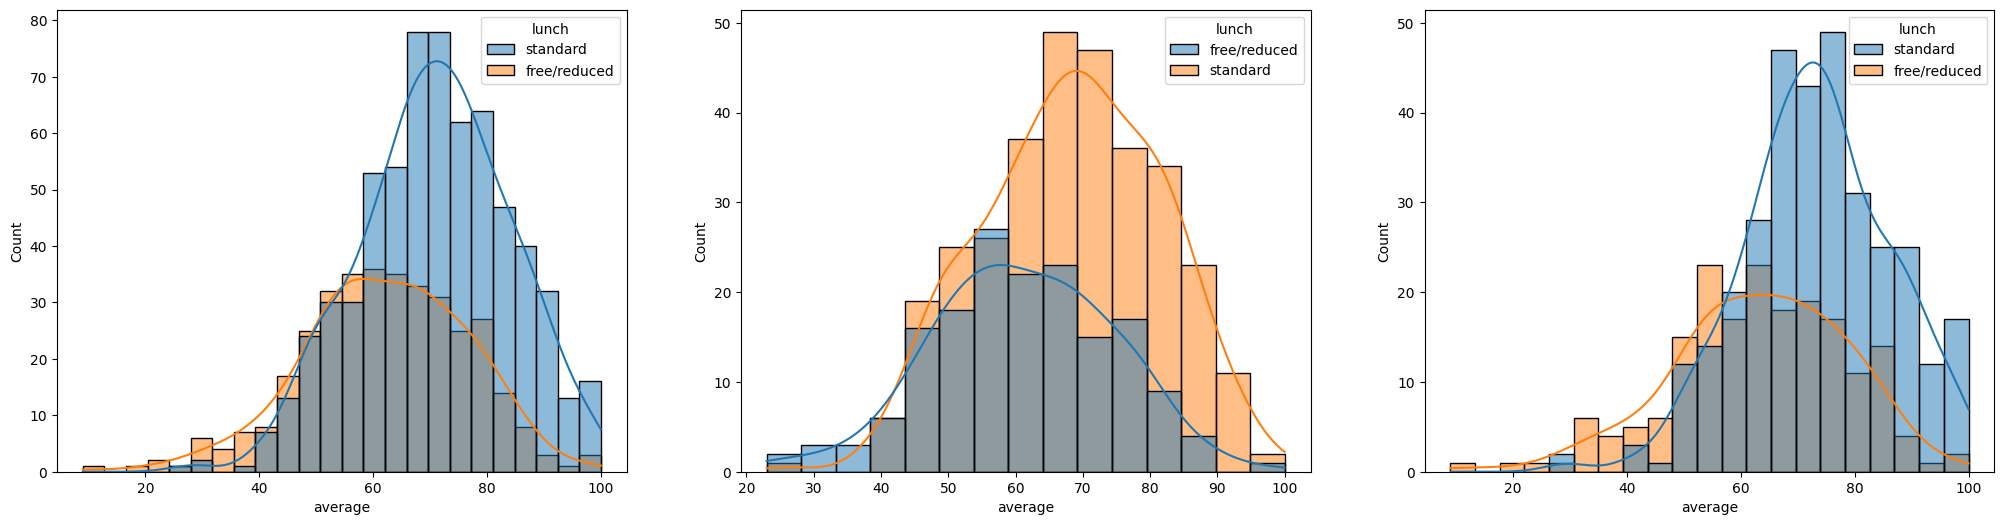

In [52]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
ax = sns.histplot(df,x='average',kde=True,hue='lunch')
plt.subplot(132)
ax = sns.histplot(df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.subplot(133)
ax = sns.histplot(df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.show()

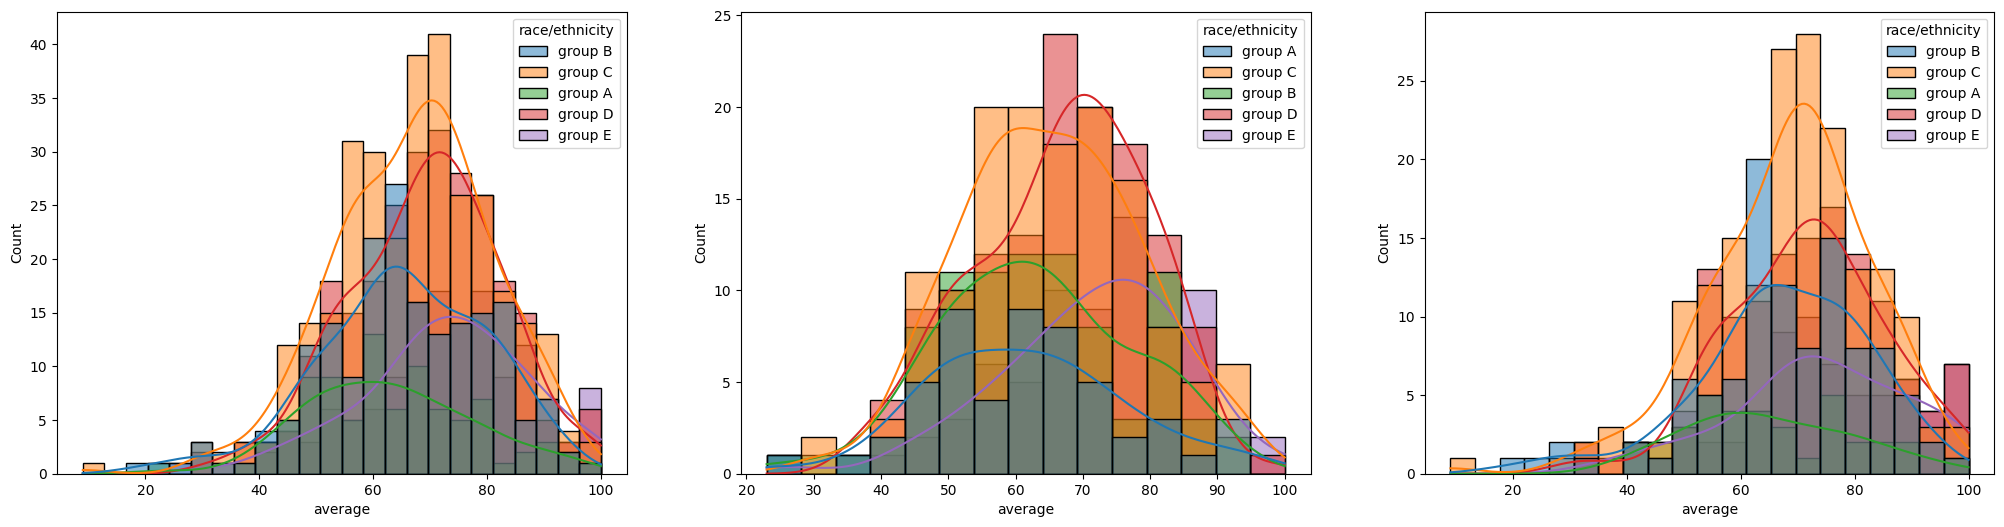

In [55]:
fig, axs = plt.subplots(1,3, figsize=(25, 6))
plt.subplot(131)
ax = sns.histplot(df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax = sns.histplot(df[df['gender']=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax = sns.histplot(df[df['gender']=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show()

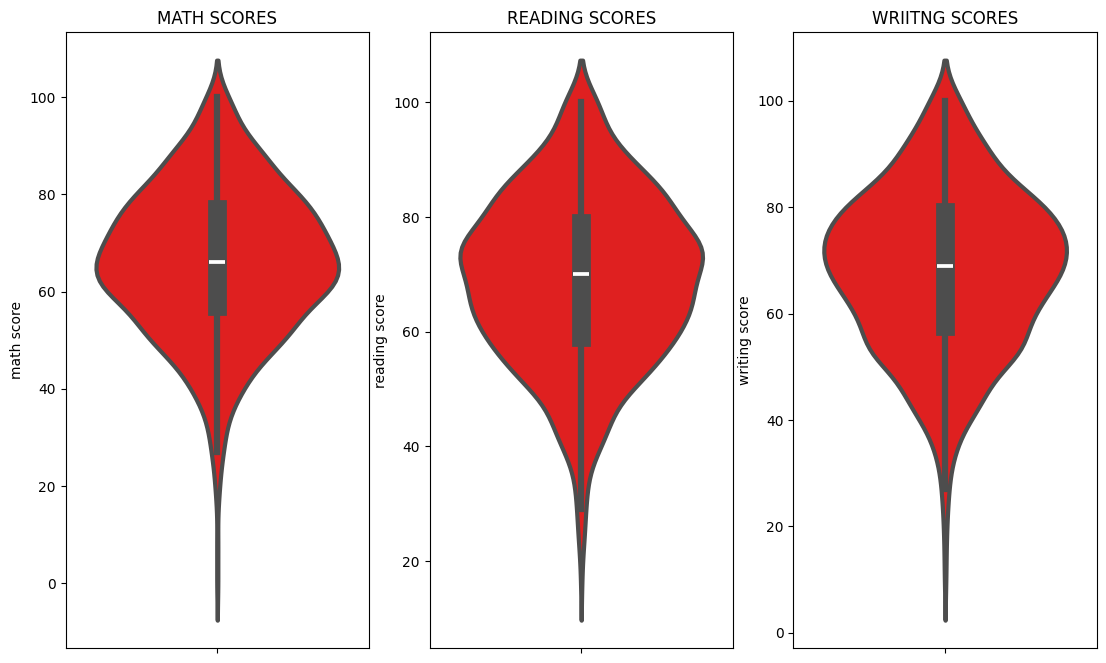

In [60]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(data=df,y='math score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(data=df,y='reading score',color='red',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRIITNG SCORES')
sns.violinplot(data=df,y='writing score',color='red',linewidth=3)
plt.show()

## Checking Outliers

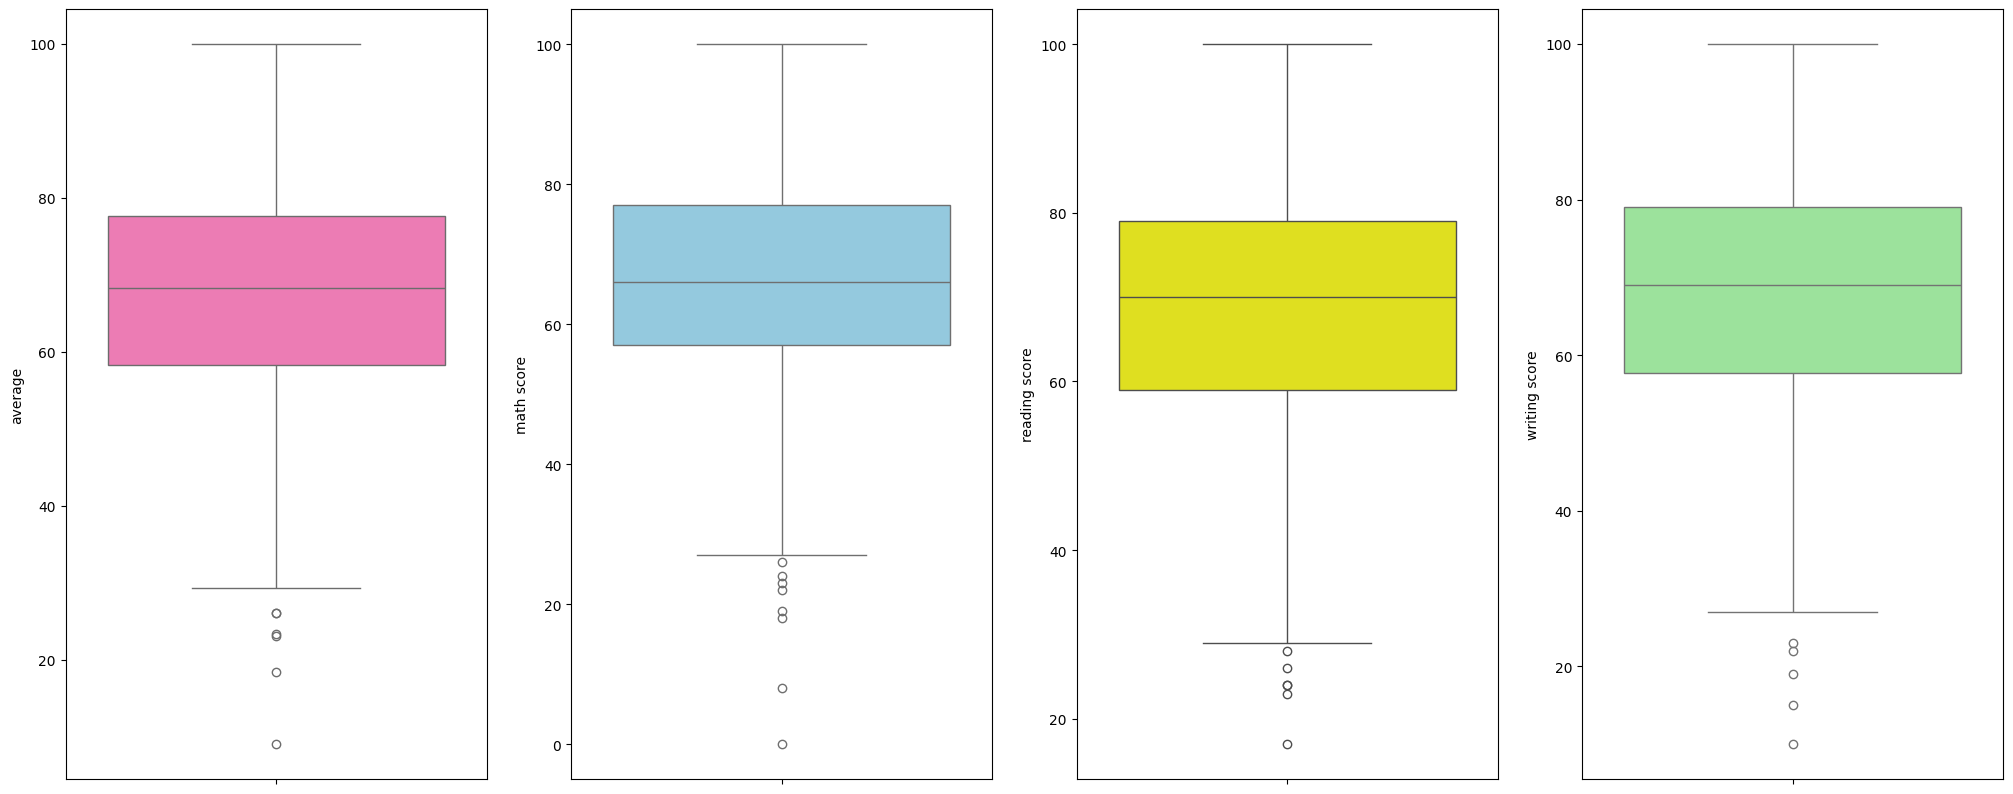

In [59]:
plt.subplots(1,4, figsize=(25, 10))
plt.subplot(141)
sns.boxplot(df['average'],color='hotpink')
plt.subplot(142)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(143)
sns.boxplot(df['reading score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['writing score'],color='lightgreen')
plt.show()